In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import time
np.random.seed(1)

In [2]:
import idx2numpy
file = 'MNIST inputs/t10k-labels.idx1-ubyte'
ytest_temp = idx2numpy.convert_from_file(file)

In [3]:
X = np.load('newX.npz')
X = X['arr']
X = X.reshape((600000, 28, 28, 1))
X.shape

(600000, 28, 28, 1)

In [4]:
X /= np.max(X)

In [5]:
Xtest = np.load('Xtest.npz')
Xtest = Xtest['arr'].reshape((10000, 28, 28, 1))
Xtest.shape

(10000, 28, 28, 1)

In [6]:
Xtest = Xtest.astype('float64')
Xtest /= 255

In [7]:
newy = np.load('newy.npy')
y = np.zeros((newy.shape[0], 10))
for i in range(newy.shape[0]):
    y[i,newy[i]] = 1
del newy

In [8]:
ytest = np.zeros((ytest_temp.shape[0], 10))
for i in range(ytest_temp.shape[0]):
    ytest[i,ytest_temp[i]] = 1
del ytest_temp

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


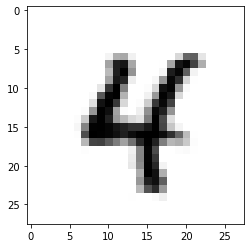

In [9]:
index = 422235
print(y[index])
plt.imshow(X[index].reshape(28, 28), cmap=plt.cm.binary)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


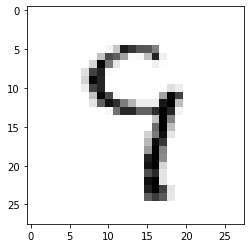

In [10]:
index = 1192
print(ytest[index])
plt.imshow(Xtest[index].reshape(28, 28), cmap=plt.cm.binary)

In [11]:
import tensorflow as tf

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.layers import BatchNormalization

In [17]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax'))

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(X, y, batch_size=320, validation_split=0.1, epochs=12)

Train on 540000 samples, validate on 60000 samples
Epoch 1/12
540000/540000 [==============================] - 1891s 4ms/sample - loss: 0.0583 - accuracy: 0.9817 - val_loss: 0.0229 - val_accuracy: 0.9929
Epoch 2/12
540000/540000 [==============================] - 1855s 3ms/sample - loss: 0.0222 - accuracy: 0.9929 - val_loss: 0.0157 - val_accuracy: 0.9948
Epoch 3/12
540000/540000 [==============================] - 1843s 3ms/sample - loss: 0.0167 - accuracy: 0.9945 - val_loss: 0.0104 - val_accuracy: 0.9966
Epoch 4/12
540000/540000 [==============================] - 1843s 3ms/sample - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0099 - val_accuracy: 0.9967
Epoch 5/12
540000/540000 [==============================] - 1851s 3ms/sample - loss: 0.0118 - accuracy: 0.9962 - val_loss: 0.0076 - val_accuracy: 0.9973
Epoch 6/12
540000/540000 [==============================] - 1843s 3ms/sample - loss: 0.0097 - accuracy: 0.9968 - val_loss: 0.0053 - val_accuracy: 0.9983
Epoch 7/12
540000/540000 [=====

In [20]:
accuracy_score(np.argmax(model.predict(Xtest), axis=1), np.argmax(ytest, axis=1))

0.9959

In [21]:
from tensorflow.keras.models import load_model

model.save('MNIST0001.h5')